Cycle division

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
from scipy.integrate import odeint
import numpy as np
import scipy
from numpy.linalg import eig
from scipy.optimize import minimize
import warnings
# warnings.filterwarnings("default")
warnings.filterwarnings("ignore")

(0.0, 4.0)

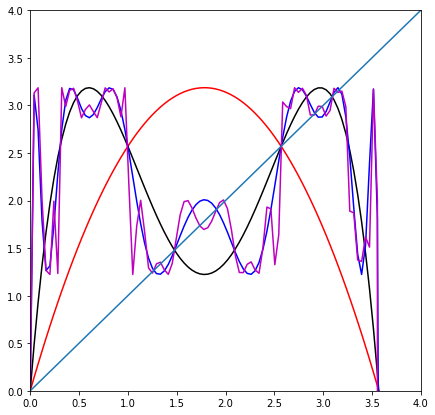

In [5]:
%matplotlib inline
a = 3.57
fu = lambda x: a*x - x**2

x = np.linspace(0,4,100)

plt.figure(figsize=(7,7))

plt.plot(x, fu(x), 'r-')

plt.plot(x, fu(fu(x)), 'k-')

plt.plot(x, fu(fu(fu(fu(x)))), 'b-')


plt.plot(x, fu(fu(fu(fu(fu(fu(fu(fu(x)))))))), 'm-')

plt.plot([0,4], [0,4])
plt.xlim(0,4)
plt.ylim(0,4)

Bifurcation plot

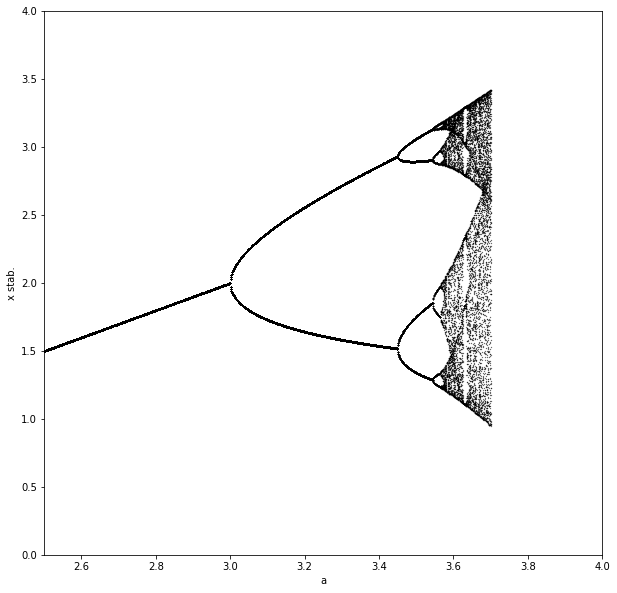

In [6]:
%matplotlib inline
a=1.5
def doTraj(a, _x0, N):
    t = list(range(N))
    x0 = [_x0]
    fu = lambda x: a*x - x**2
    for i in t:
        x0.append(fu(x0[-1]))
    return x0

fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_xlim(2.5, 4)
ax.set_ylim(0,4)
plt.xlabel('a')
plt.ylabel('x stab.')

for a in np.linspace(2.5, 3.7, 1000):
    xtraj = doTraj(a, 0.1, 10000)
    plt.plot([a]*100, xtraj[-100:], '.k', ms=0.5)

plt.show()

Poincare map plot

No handles with labels found to put in legend.


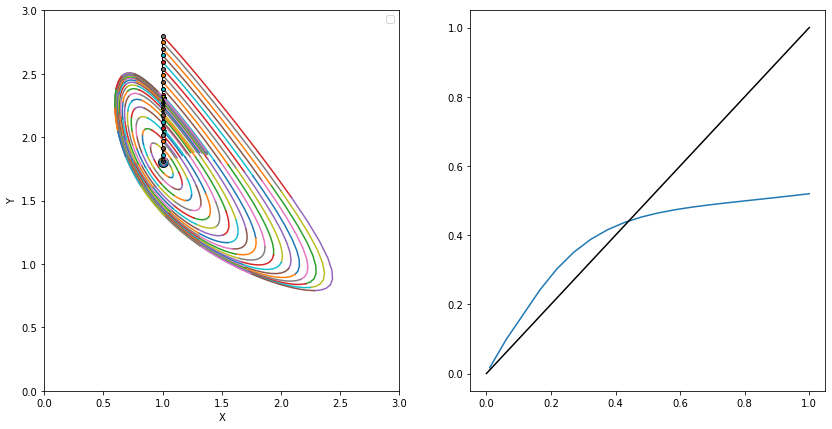

In [7]:
%matplotlib inline
A = 1.0; B = 3.0; k1 = 2.0; km1 = 2.0; k2 = 1.8; k3 = 3.0

P = lambda x,y: k1*A - (km1 + k2*B)*x + k3*x**2*y
Q = lambda x,y: k2*B*x - k3*x**2*y

fun = lambda p,t: [ P(p[0],p[1]), Q(p[0],p[1]) ]
pot = lambda p: P(*p)**2 + Q(*p)**2

res = minimize(pot, x0=[3,1e-3] )
pt = res.x

plt.figure(figsize=(14,7))
plt.subplot(121)



# stationary point
plt.plot([pt[0]], [pt[1]], 'o', mec='k', ms=10)
plt.arrow(*pt, 0,1)

x0_ = pt[0]
tt = np.linspace(0,0.2, 10)
n0s = []
y0s = np.linspace(pt[1]+1e-2, pt[1]+1, 20)
for y0_ in y0s:
    xy0 = [x0_, y0_]
    x0, y0 = x0_,y0_
    x1, y1 = x0_,y0_
    fi = 0
    turnFlag = True
    ori = None
    fi0 = 0
    while (turnFlag):
        fi0 = fi
        x0,y0 = x1,y1
        zz = odeint(fun, [x0,y0], tt)
        x1,y1 = zz[-1,:]
        fi = np.arctan2( (y1-pt[1]), (x1-pt[0]) ) - np.pi/2
        # determine orientation only for the first time
        if ori is None:
            ori = (fi > 0)
        plt.plot(zz[:,0], zz[:,1])
        # DEBUG:
        # print('%f %f %d' % (fi0/np.pi*180, fi/np.pi*180, ori) )
        ii = zz[:,0].searchsorted(pt[0])
        turnFlag = not ( ( (fi > 0) and (fi0 < 0) and ori) or \
                       ( (fi < 0) and (fi0 > 0) and not ori) )
    
    plt.plot([xy0[0]], [xy0[1]], 'o', mec='k', ms=4)
    plt.plot([zz[ii,0]], [zz[ii,1]], 'v', mec='k', ms=4)
    n0s.append(zz[ii,1])

n0s = np.array(n0s) - pt[1]
y0s = np.array(y0s) - pt[1]

plt.legend()
plt.xlim(0,3)
plt.ylim(0,3)
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(122)
plt.plot(y0s, n0s)
plt.plot([0,1], [0,1], 'k-')

plt.show()